<h1><center>Практическая работа 9</center></h1>
<h1><center>Расчет параметров сети 802.16e (мобильный WiMAX)</center></h1>
<h4>Выполнил Дмитриев Егор ИКТУ-88 Вариант 3</h4>

### Цель работы:
> Ознакомиться с принципами расчета параметров сети 802.16e (мобильный WiMAX).

### 1. Выбор значений в соответсвии с вариантом

$ f = 2,5ГГц; B = 10МГц; $\
Схема модуляции - $QAM-16 (1/2)$\
$h_{bs} = 30; P_{Txbs} = 32; G_{Txbs} = 16; G_{Rxbs} = 16; h_{ms} = 4; P_{Txms} = 27; G_{Txms} = 1; G_{Rxms} = 1$

### 2. Расчет чувствительности приемников БС и МС

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

f = 2.5
B = 10
h_bs = 30
P_Txbs = 32
G_Txbs = 16
G_Rxbs = 16
h_ms = 4
P_Txms = 27
G_Txms = 1
G_Rxms = 1

N_all = 1024
N_use = 841
N_DLdata = 720
N_ULdata = 560
n = 28/25

K_SNR = 10.5
R_symb = 2
K_n = 7
L_I = 5
L_f = 2
I_DL = 2
I_UL = 3
F = 10

In [2]:
df = B*10**6 * n * (N_use/N_all)
Phn = -174 + 10*math.log10(df)
S_R = Phn + K_SNR + K_n + L_I
print('Чувствительность приемника =', S_R, '[дБ]')

Чувствительность приемника = -81.86285938171719 [дБ]


### 3. Расчет бюджета линии для нисходящего и восходящего направлений для кажого из 4 типов застройки

#### Для нисходящего направления

In [3]:
U_C = np.array([-4, -3, 0, 5])
P_DL = np.zeros(4,)
for i in range(4):
    P_DL[i] = P_Txbs - S_R + G_Txbs + G_Rxms - L_f - F - I_DL + U_C[i]
    print('P_DL = ', P_DL[i])

P_DL =  112.86285938171719
P_DL =  113.86285938171719
P_DL =  116.86285938171719
P_DL =  121.86285938171719


#### Для восходящего направления

In [5]:
P_UL = np.zeros(4,)
for i in range(4):
    P_UL[i] = P_Txms - S_R + G_Txms + G_Rxbs - F - I_UL + U_C[i]
    print('P_UL = ', P_UL[i])

P_UL =  108.86285938171719
P_UL =  109.86285938171719
P_UL =  112.86285938171719
P_UL =  117.86285938171719


### 4. Расчет зависимости величины потерь на трассе радиосигнала от расстояния d между БС и МС

In [6]:
a_A = 4.6
b_A = 0.0075
c_A = 12.6
s_A = 10.6

a_B = 4.0
b_B = 0.0065
c_B = 17.1
s_B = 9.6

a_C = 3.6
b_C = 0.0055
c_C = 20.0
s_C = 8.2

d = np.zeros(20,)
k = 100
for i in range(20):
    d[i] = k
    k += 100

#### Для ландшафта типа А

In [7]:
dL_f = 6*math.log10(f/2)
dL_h_1 = -10.8*math.log10(h_ms/2)
dL_h_2 = -20*math.log10(h_ms/2)
la = 3*10**8/(f*10**9)
d0 = 100

In [8]:
L_A = np.zeros(20,)
gam_A = a_A - b_A * h_bs + (c_A/h_bs)
for i in range(20):
    L_A[i] = 20 * math.log10((4*math.pi*d0)/la) + 10 * gam_A * math.log10(d[i]/d0) + s_A + dL_f + dL_h_1
    print('L_A =',L_A[i],'дБ')

L_A = 88.33090848436676 дБ
L_A = 102.76529677645466 дБ
L_A = 111.20887264817458 дБ
L_A = 117.19968506854255 дБ
L_A = 121.84652019227886 дБ
L_A = 125.64326094026248 дБ
L_A = 128.85335950305037 дБ
L_A = 131.63407336063045 дБ
L_A = 134.08683681198238 дБ
L_A = 136.28090848436676 дБ
L_A = 138.26568773770367 дБ
L_A = 140.07764923235038 дБ
L_A = 141.74449222747958 дБ
L_A = 143.28774779513827 дБ
L_A = 144.7244843560867 дБ
L_A = 146.06846165271836 дБ
L_A = 147.33093426445498 дБ
L_A = 148.52122510407028 дБ
L_A = 149.64714365005491 дБ
L_A = 150.71529677645466 дБ


#### Для ландшафта типа B

In [9]:
L_B = np.zeros(20,)
gam_B = a_B - b_B * h_bs + (c_B/h_bs)
for i in range(20):
    L_B[i] = 20 * math.log10((4*math.pi*d0)/la) + 10 * gam_B * math.log10(d[i]/d0) + s_B + dL_f + dL_h_1
    print('L_B =',L_B[i],'дБ')

L_B = 87.33090848436676 дБ
L_B = 100.50097079466593 дБ
L_B = 108.20496337835199 дБ
L_B = 113.67103310496512 дБ
L_B = 117.91084617406759 дБ
L_B = 121.37502568865116 дБ
L_B = 124.30394773499049 дБ
L_B = 126.8410954152643 дБ
L_B = 129.07901827233724 дБ
L_B = 131.08090848436677 дБ
L_B = 132.8918384600391 дБ
L_B = 134.54508799895035 дБ
L_B = 136.06593014779088 дБ
L_B = 137.47401004528967 дБ
L_B = 138.78490106805282 дБ
L_B = 140.01115772556346 дБ
L_B = 141.16304879466622 дБ
L_B = 142.2490805826364 дБ
L_B = 143.276378526053 дБ
L_B = 144.25097079466593 дБ


#### Для ландшафта типа C

In [10]:
L_C = np.zeros(20,)
gam_C = a_C - b_C * h_bs + (c_C/h_bs)
for i in range(20):
    L_C[i] = 20 * math.log10((4*math.pi*d0)/la) + 10 * gam_C * math.log10(d[i]/d0) + s_C + dL_f + dL_h_2
    print('L_C =',L_C[i],'дБ')

L_C = 83.16143252425815 дБ
L_C = 95.50867951307578 дБ
L_C = 102.7313559886763 дБ
L_C = 107.8559265018934 дБ
L_C = 111.83085220210718 дБ
L_C = 115.07860297749393 дБ
L_C = 117.82453713217625 дБ
L_C = 120.20317349071102 дБ
L_C = 122.30127945309445 дБ
L_C = 124.1780991909248 дБ
L_C = 125.87588916049799 дБ
L_C = 127.42584996631155 дБ
L_C = 128.8516756913769 дБ
L_C = 130.17178412099386 дБ
L_C = 131.40077566652533 дБ
L_C = 132.55042047952864 дБ
L_C = 133.63034578279033 дБ
L_C = 134.64852644191205 дБ
L_C = 135.61164272334 дБ
L_C = 136.52534617974243 дБ


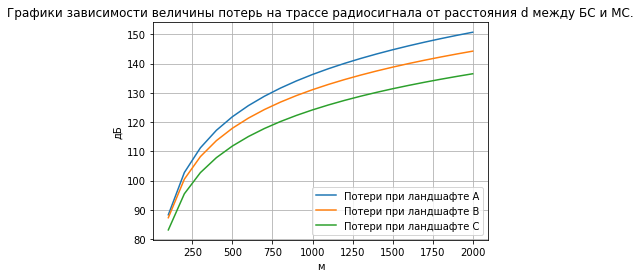

In [11]:
plt.plot(d, L_A, label = 'Потери при ландшафте A')
plt.plot(d, L_B, label = 'Потери при ландшафте B')
plt.plot(d, L_C, label = 'Потери при ландшафте C')
plt.xlabel('м')
plt.ylabel('дБ')
plt.title('Графики зависимости величины потерь на трассе радиосигнала от расстояния d между БС и МС.')
plt.grid()
plt.legend()

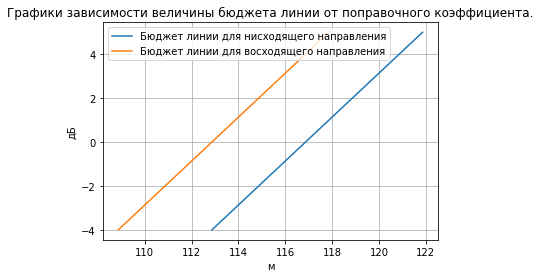

In [12]:
plt.plot(P_DL, U_C, label = 'Бюджет линии для нисходящего направления')
plt.plot(P_UL, U_C, label = 'Бюджет линии для восходящего направления')
plt.xlabel('м')
plt.ylabel('дБ')
plt.title('Графики зависимости величины бюджета линии от поправочного коэффициента.')
plt.grid()
plt.legend()

### 5. Расчет скорости передачи для каждого из направлений

In [13]:
T_h = 1/5
T_g = 1/8
K_DLtdd = 3/4
K_ULtdd = 1/4

In [14]:
R_DL = (B*10**6) * n * (N_DLdata/N_all) * R_symb *(1 - (T_h/(1 + T_g))) * K_DLtdd
R_UL = (B*10**6) * n * (N_ULdata/N_all) * R_symb *(1 - (T_h/(1 + T_g))) * K_ULtdd
print('R_DL = ', R_DL, 'бит/с')
print('R_UL = ', R_UL, 'бит/с')

R_DL =  9712500.000000002 бит/с
R_UL =  2518055.555555556 бит/с
